### **Note :**
* You will need the below 3 datasets to work on the questions : 
  * **ipl_matches.csv**
  * **ipl_batting.csv**
  * **ipl_deliveries.csv**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
import os
os.listdir('/gdrive/My Drive/data')

['ipl_matches.csv',
 'ipl_matches.gsheet',
 'ipl_batting.csv',
 'ipl_deliveries.csv']

Name : Vidhi Chhatbar

### **Question 1**
Write **Python** code for the following
* Read the **ipl_matches.csv** dataset
* Display **data-type** of each column
* Define **granularity** for the dataset **ipl_matches**
* Write code to create a **primary key** as a **new column** for the dataset 
  * Convert match_date into the format **YYYYMMDD**
  * Depending upon whether the given match is the **1st** of **2nd** for the day, append a string **01 or 02** to the end
  * **Ex.** if 2 matches took place on 18-04-2009 then the primary key of the 1st match should look like **2009041801** and second match as **2009041802**
--------------------

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('/gdrive/My Drive/data/ipl_matches.csv')

In [ ]:
col_types = df1.dtypes
print(col_types)

match_date        object
Ground            object
Team 1            object
Team 2            object
Winner            object
year               int64
month              int64
day                int64
win_mode          object
margin           float64
toss_winner       object
toss_decision     object
match_no           int64
dtype: object


Granularity  for ipl_matches : match_date and match_no

In [ ]:
#df1['date_parsed'] = pd.to_datetime(df1['match_date'])
#format_date = df1['date_parsed'].dt.strftime('%Y%m%d')
#format_date.head()
#grp_date = df1.groupby('match_date')
def pk(df1,format_date):
  s1 = ["01","02"]
  i=0
  if(df1['day'].count() > 1):
    while(i<2):
      df1['primary_key'] = format_date + s1[i]
      i+=1
  else:
    df1['primary_key'] = format_date + '01'
#df1 = df1.groupby('match_date')
df1['date_parsed'] = pd.to_datetime(df1['match_date'])
format_date = df1['date_parsed'].dt.strftime('%Y%m%d')
df1['ini_key'] = format_date
df1['primary_key'] = ''
for i in range(0,len(df1)):
  if(i==0):
    df1['primary_key'][i] = df1['ini_key'][i] + '01'
  else:
    if(df1['match_date'][i] == df1['match_date'][i-1]):
      df1['primary_key'][i] = df1['ini_key'][i] + '02'
    else:
      df1['primary_key'][i] = df1['ini_key'][i] + '01'
#lst = [df1.columns.values.tolist()]+df1.values.tolist()
#df2 = pd.Series(lst)
#print(type(df2))
#pk(df2.groupby('match_date'),format_date)  
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,date_parsed,ini_key,primary_key
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,2008-04-18,20080418,2008041801
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,2008-04-19,20080419,2008041901
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,2008-04-19,20080419,2008041902
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,2008-04-20,20080420,2008042001
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,2008-04-20,20080420,2008042002


### **Question 2** 
Let's look at the below statement : <br>
**It is said that you win half the match if you win the toss** <br><br>
So, let's understand to what extent teams who **won the toss** also **won the matches**
  * Write code to find out **% matches by team** (across all seasons) where they **won the toss**
  * What **% of matches** which the teams **won the toss also ended up winning the matches**?
  * Exhibit the above as a **% of total matches**
  * Which team tops the chart? Meaning which team took full advantage of the opportunity of winning the toss

**Ex :** If CSK played a total of **100** matches and won toss in **70** of them. This would mean **70%** of tosses were won by them. Now, if out of these 70 they ended up winning **28** of them then they won **40%** of the matches where they had won the toss. This is **28%** of total matches

In [ ]:
df1['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Capitals',
       'no toss', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Sunrisers Hyderabad', 'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant'], dtype=object)

In [ ]:
dups_team1 = df1.pivot_table(index=['Team 1'], aggfunc='size')
dups_team2 = df1.pivot_table(index=['Team 2'], aggfunc='size')
print(dups_team1 + dups_team2)

Team 1
Chennai Super Kings            166
Deccan Chargers                 76
Delhi Capitals                 178
Gujarat Lions                   30
Kings XI Punjab                175
Kochi Tuskers Kerala            14
Kolkata Knight Riders          181
Mumbai Indians                 188
Pune Warriors                   46
Rajasthan Royals               150
Rising Pune Supergiant          30
Royal Challengers Bangalore    183
Sunrisers Hyderabad            109
dtype: int64


In [ ]:
csk=0
rcb = 0
dc=0
dlc=0
gl=0
kp=0
ktk=0
kkr=0
mi=0
pw=0
rr=0
rps=0
sh=0
for i in df1.index:
    if((df1['toss_winner'][i] == 'Royal Challengers Bangalore')):
      rcb +=1
    if((df1['toss_winner'][i] == 'Chennai Super Kings')):
      csk +=1
    if((df1['toss_winner'][i] == 'Deccan Chargers')):
      dc +=1
    if((df1['toss_winner'][i] == 'Delhi Capitals')):
      dlc +=1
    if((df1['toss_winner'][i] == 'Gujarat Lions')):
      gl +=1
    if((df1['toss_winner'][i] == 'Kings XI Punjab')):
      kp +=1
    if((df1['toss_winner'][i] == 'Kochi Tuskers Kerela')):
      ktk +=1
    if((df1['toss_winner'][i] == 'Kolkata Knight Riders')):
      kkr +=1
    if((df1['toss_winner'][i] == 'Mumbai Indians')):
      mi +=1
    if((df1['toss_winner'][i] == 'Pune Warriors')):
      pw +=1
    if((df1['toss_winner'][i] == 'Rajasthan Royals')):
      rr +=1
    if((df1['toss_winner'][i] == 'Rising Pune Supergiant')):
      rps +=1
    if((df1['toss_winner'][i] == 'Sunrisers Hyderabad')):
      sh +=1
print(csk)
for i in df1.index:
  if((df1['toss_winner'][i] == 'Chennai Super Kings')):
    per1 = csk/166*100
    print('csk: ', per1)
    break
for i in df1.index:
  if((df1['toss_winner'][i] == 'Royal Challengers Bangalore')):
    per1 = rcb/183*100
    print('rcb: ',per1)
    break
for i in df1.index:
  if((df1['toss_winner'][i] == 'Deccan Chargers')):
    per1 = dc/76*100
    print('dc: ',per1)
    break
for i in df1.index:
  if((df1['toss_winner'][i] == 'Delhi Capitals')):
    per1 = dlc/178*100
    print('dlc: ',per1)
    break
for i in df1.index:
  if((df1['toss_winner'][i] == 'Gujarat Lions')):
    per1 = gl/30*100
    print('gl: ',per1)
    break
for i in df1.index:
  if((df1['toss_winner'][i] == 'Kochi Tuskers Kerela')):
    per1 = ktk/14*100
    print('kkr: ',per1)
    break
for i in df1.index:
  if((df1['toss_winner'][i] == 'Kings XI Punjab')):
    per1 = kp/175*100
    print('kp: ',per1)
    break
for i in df1.index:
  if((df1['toss_winner'][i] == 'Kolkata Knight Riders')):
    per1 = kkr/181*100
    print('kkr: ',per1)
    break
for i in df1.index:
  if((df1['toss_winner'][i] == 'Mumbai Indians')):
    per1 = mi/188*100
    print('mi: ',per1)
    break
for i in df1.index:
  if((df1['toss_winner'][i] == 'Pune Warriors')):
    per1 = pw/46*100
    print('pw: ',per1)
    break
for i in df1.index:
  if((df1['toss_winner'][i] == 'Rajasthan Royals')):
    per1 = rr/150*100
    print('rr: ',per1)
    break
for i in df1.index:
  if((df1['toss_winner'][i] == 'Rising Pune Supergiant')):
    per1 = rps/30*100
    print('rps: ',per1)
    break
for i in df1.index:
  if((df1['toss_winner'][i] == 'Sunrisers Hyderabad')):
    per1 = sh/109*100
    print('sh: ',per1)
    break

89
csk:  53.6144578313253
rcb:  44.80874316939891
dc:  56.57894736842105
dlc:  50.56179775280899
gl:  50.0
kp:  45.714285714285715
kkr:  50.82872928176796
mi:  52.12765957446809
pw:  43.47826086956522
rr:  53.333333333333336
rps:  20.0
sh:  42.201834862385326


In [ ]:
wcsk=0
wrcb = 0
wdc=0
wdlc=0
wgl=0
wkp=0
wktk=0
wkkr=0
wmi=0
wpw=0
wrr=0
wrps=0
wsh=0
for i in df1.index:
    if((df1['Winner'][i] == 'Royal Challengers Bangalore') & (df1['toss_winner'][i] == 'Royal Challengers Bangalore')):
      wrcb +=1
    if((df1['Winner'][i] == 'Chennai Super Kings') & (df1['toss_winner'][i] == 'Chennai Super Kings') ):
      wcsk +=1
    if((df1['Winner'][i] == 'Deccan Chargers') & (df1['toss_winner'][i] == 'Deccan Chargers')):
      wdc +=1
    if((df1['Winner'][i] == 'Delhi Capitals') & (df1['toss_winner'][i] == 'Delhi Capitals') ):
      wdlc +=1
    if((df1['Winner'][i] == 'Gujarat Lions') & (df1['toss_winner'][i] == 'Gujarat Lions')):
      wgl +=1
    if((df1['Winner'][i] == 'Kings XI Punjab') & (df1['toss_winner'][i] == 'Kings XI Punjab')):
      wkp +=1
    if((df1['Winner'][i] == 'Kochi Tuskers Kerela') & (df1['toss_winner'][i] == 'Kochi Tuskers Kerela')):
      wktk +=1
    if((df1['Winner'][i] == 'Kolkata Knight Riders') & (df1['toss_winner'][i] == 'Kolkata Knight Riders')):
      wkkr +=1
    if((df1['Winner'][i] == 'Mumbai Indians') & (df1['toss_winner'][i] == 'Mumbai Indians')):
      wmi +=1
    if((df1['Winner'][i] == 'Pune Warriors') & (df1['toss_winner'][i] == 'Pune Warriors')):
      wpw +=1
    if((df1['Winner'][i] == 'Rajasthan Royals') & (df1['toss_winner'][i] == 'Rajasthan Royals')):
      wrr +=1
    if((df1['Winner'][i] == 'Rising Pune Supergiant') & (df1['toss_winner'][i] == 'Rising Pune Supergiant')):
      wrps +=1
    if((df1['Winner'][i] == 'Sunrisers Hyderabad') & (df1['toss_winner'][i] == 'Sunrisers Hyderabad')):
      wsh +=1
print(wcsk)
for i in df1.index:
  if((df1['Winner'][i] == 'Chennai Super Kings')):
    per2 = wcsk/csk * 100
    print('csk: ', per2)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Royal Challengers Bangalore')):
    per2 = wrcb/rcb *100
    print('rcb: ',per2)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Deccan Chargers')):
    per2 = wdc/dc *100
    print('dc: ',per2)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Delhi Capitals')):
    per2 = wdlc/dlc *100
    print('dlc: ',per2)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Gujarat Lions')):
    per2 = wgl/gl*100
    print('gl: ',per2)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Kochi Tuskers Kerela')):
    per2 = wktk/ktk*100
    print('kkr: ',per2)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Kings XI Punjab')):
    per2 = wkp/kp*100
    print('kp: ',per2)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Kolkata Knight Riders')):
    per2 = wkkr/kkr*100
    print('kkr: ',per2)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Mumbai Indians')):
    per2 = wmi/mi*100
    print('mi: ',per2)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Pune Warriors')):
    per2 = wpw/pw*100
    print('pw: ',per2)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Rajasthan Royals')):
    per2 = wrr/rr*100
    print('rr: ',per2)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Rising Pune Supergiant')):
    per2 = wrps/rps*100
    print('rps: ',per2)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Sunrisers Hyderabad')):
    per2 = wsh/sh*100
    print('sh: ',per2)
    break

57
csk:  64.04494382022472
rcb:  48.78048780487805
dc:  44.18604651162791
dlc:  45.55555555555556
gl:  66.66666666666666
kp:  42.5
kkr:  57.608695652173914
mi:  56.12244897959183
pw:  15.0
rr:  51.24999999999999
rps:  83.33333333333334
sh:  50.0


In [ ]:
for i in df1.index:
  if((df1['Winner'][i] == 'Chennai Super Kings')):
    per1 = wcsk/166*100
    print('csk: ', per1)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Royal Challengers Bangalore')):
    per1 = wrcb/183*100
    print('rcb: ',per1)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Deccan Chargers')):
    per1 = wdc/76*100
    print('dc: ',per1)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Delhi Capitals')):
    per1 = wdlc/178*100
    print('dlc: ',per1)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Gujarat Lions')):
    per1 = wgl/30*100
    print('gl: ',per1)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Kochi Tuskers Kerela')):
    per1 = wktk/14*100
    print('kkr: ',per1)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Kings XI Punjab')):
    per1 = wkp/175*100
    print('kp: ',per1)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Kolkata Knight Riders')):
    per1 = wkkr/181*100
    print('kkr: ',per1)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Mumbai Indians')):
    per1 = wmi/188*100
    print('mi: ',per1)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Pune Warriors')):
    per1 = wpw/46*100
    print('pw: ',per1)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Rajasthan Royals')):
    per1 = wrr/150*100
    print('rr: ',per1)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Rising Pune Supergiant')):
    per1 = wrps/30*100
    print('rps: ',per1)
    break
for i in df1.index:
  if((df1['Winner'][i] == 'Sunrisers Hyderabad')):
    per1 = wsh/109*100
    print('sh: ',per1)
    break

csk:  34.33734939759036
rcb:  21.85792349726776
dc:  25.0
dlc:  23.03370786516854
gl:  33.33333333333333
kp:  19.428571428571427
kkr:  29.2817679558011
mi:  29.25531914893617
pw:  6.521739130434782
rr:  27.333333333333332
rps:  16.666666666666664
sh:  21.100917431192663


Chennai Super Kings tops the chart.

### **Question 3** 
* List the names of the **top 10 batsmen** by total runs accumulated across all the seasons
  * The output should be stored in a list

--------------------------



In [ ]:
df3 = pd.read_csv('/gdrive/My Drive/data/ipl_batting.csv')

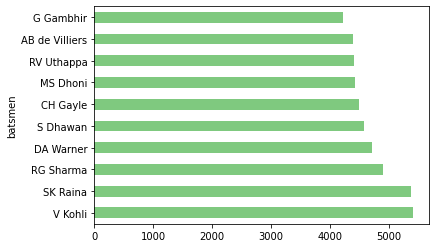

In [ ]:
batsman_runs = df3.groupby(['batsmen'])['R'].sum()
batsman_runs.sort_values(ascending = False, inplace = True)
batsman_runs[:10].plot(x= 'batsmen', y = 'R', kind = 'barh', colormap = 'Accent')


In [ ]:
top10_list = list(['V Kohli','SK Raina','RG Sharma','DA Warner','S Dhawan','CH Gayle','MS Dhoni','RV Uthappa','AB de Villiers','G Gambhir'])
print(top10_list)

['V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan', 'CH Gayle', 'MS Dhoni', 'RV Uthappa', 'AB de Villiers', 'G Gambhir']


### **Question 4**
* Visualize the **runs made vs balls faced** in a jointplot. You should do this for all batsmen who batted in the **IPL season 2017**

--------------------

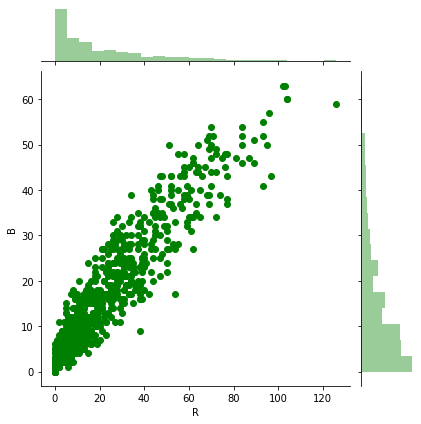

In [ ]:
# write your code here. Feel free to add multiple cells as per your need 2017-04-05 --- 2017-05-21
#df3['Date'] = pd.to_datetime(df3['match_date'])
#df3 = df3.set_index('Date')
df3['Year'] = pd.DatetimeIndex(df3['match_date']).year
df3['Month'] = pd.DatetimeIndex(df3['match_date']).month
df3['Day'] = pd.DatetimeIndex(df3['match_date']).day
#print(df3.head())
df4 = pd.DataFrame(index=range(0,914),columns=['Year','batsmen','R','B'])
j=0
for i in df3.index:
  if((df3['Year'][i]==2017)):
    df4['Year'][j] = df3['Year'][i]
    df4['batsmen'][j] = df3['batsmen'][i]
    df4['R'][j] = df3['R'][i]
    df4['B'][j] = df3['B'][i]
    j+=1
#print(df4['batsmen'].nunique())
#df4 = df4.groupby('batsmen')
#batsmen_runs = df4.groupby(['batsmen'])['R'].sum()
#batsmen_runs.values(inplace = True)
#df4.groupby(['batsmen'])['runs'] = batsmen_runs
#batsmen_bowls = df4.groupby(['batsmen'])['B'].sum()
#df4['bowls'] = batsmen_bowls

import seaborn as sns
#batsmen = df4.groupby(['batsmen'])
#for b in batsmen:
  #batsmen_runs = batsmen['R'].sum()
  #df4['runs']= batsmen['R'].sum()#batsmen_runs
g = sns.jointplot("R", "B", data=df4,color="g")
#print(df4.groupby('batsmen').head())

### **Question 5**
* Create a new calculated column called **boundary_contribution**. It is calculated as : **(total runs made in 4s + 6s)/(total runs scored)**
* Create a scatter-plot between **boundary_contribution** and **strike_rate** where each dot represents an innings by a batsman
* Aggregate **boundary_contribution** by player and list down **top 10** players by boundary_contribution across all seasons
---------------------------------

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
x='default'
df3['boundary_contribution'] = float(0)
for i in df3.index:
  df3['boundary_contribution'][i] = (df3['fours'][i]*4 + df3['sixes'][i]*6)/df3['R'][i]
df3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,match_key,boundary_contribution
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,caught,Thushara,Hayden,1,18-04-2009,2009041801,0.769231
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,not out,no bowler,no fielder,0,18-04-2009,2009041801,0.474576
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,caught,Gony,Dhoni,1,18-04-2009,2009041801,0.363636
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,caught,Gony,Gony,1,18-04-2009,2009041801,0.444444
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,caught,Joginder Sharma,Hayden,1,18-04-2009,2009041801,0.800000


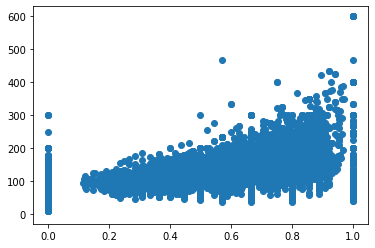

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df3['boundary_contribution'], df3['SR'])
plt.show()


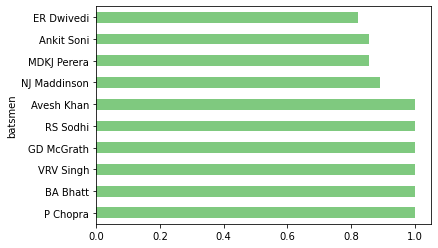

In [ ]:
batsman_bc = df3.groupby('batsmen')['boundary_contribution'].mean()
batsman_bc.sort_values(ascending = False, inplace = True)
batsman_bc[:10].plot(x= 'batsmen', y = 'boundary_contribution', kind = 'barh', colormap = 'Accent')


### **Question 6**
* List down **top 10** batsmen by **strike_rate** across all seasons. Plot the top 10 batsmen on a **bar chart**
* Repeat the above task for **bottom 10** batsmen
* Create a sub-plot with three sections. Show the below visuals in each : 
  * Box plot of **strike rates** of the top 10 batsmen listed in 1st part of the question
  * Box plot of **runs scored** of the top 10 batsmen
  * Box plot of **boundary_contribution** of the top 10 batsmen
----------------------------------

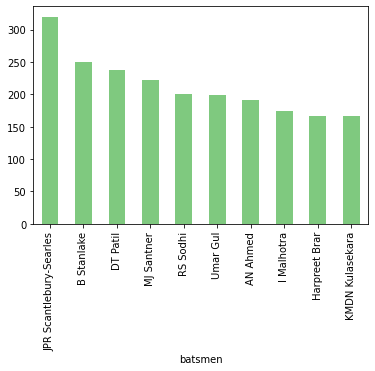

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
batsman_sr = df3.groupby('batsmen')['SR'].mean()
batsman_sr.sort_values(ascending = False, inplace = True)
batsman_sr[:10].plot(x= 'batsmen', y = 'SR', kind = 'bar', colormap = 'Accent')


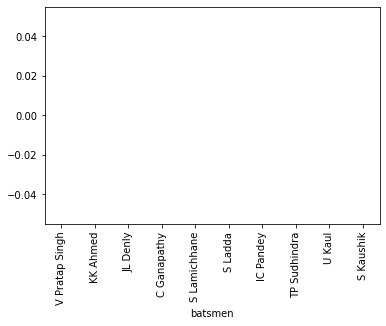

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
batsman_srb = df3.groupby('batsmen')['SR'].mean()
batsman_srb.sort_values(ascending = True, inplace = True)
batsman_srb[:10].plot(x= 'batsmen', y = 'SR', kind = 'bar', colormap = 'Accent')


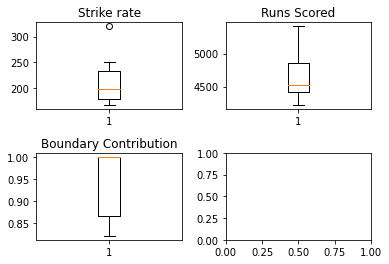

In [ ]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
ax1.boxplot(batsman_sr[:10])
ax2.boxplot(batsman_runs[:10])
ax3.boxplot(batsman_bc[:10])
ax1.set_title('Strike rate')
ax2.set_title('Runs Scored')
ax3.set_title('Boundary Contribution')
fig.subplots_adjust(hspace=0.5, wspace=0.3)

### **Question 7**
* Create a new column called **dismissal_status**. Use the wicket_status column to extract values like **caught, lbw, bowled** etc. and store in dismissal_status column
* Extract the bowler name from the column **wicket_status** and store in a new column called **bowler_name**
* Extract fielder name from the **wicket_status** column and store in a new column called **fielder_name**
* Create a new column called **fielder_involved**. Set it to 1 if a fielder was involved in the dismissal else 0
* Create a **count plot** of player dismissals across the categories calculated above. Which category stands out from the rest?
------------------


In [ ]:
batting_df = pd.read_csv('/gdrive/My Drive/data/ipl_batting.csv')
batting_df['wicket_status'].str.split(' ', 1).str.get(0).unique()

dismissal_status_map = {'c':'caught', 'not':'not out', 'run':'run out', 'b':'bowled', 'st':'stumped', 'lbw':'lbw', 'absent':'absent hurt', 'hit':'hit wicket', 'retired':'retired out', 'obstructing':'obstructing the field'}

In [ ]:
batting_df['dismissal_status'] = batting_df.apply(lambda x : dismissal_status_map[x['wicket_status'].split(" ", 1)[0]], axis=1)
batting_df

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key,dismissal_status
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,18-04-2009,2009041801,caught
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,18-04-2009,2009041801,not out
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,18-04-2009,2009041801,caught
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,18-04-2009,2009041801,caught
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,18-04-2009,2009041801,caught
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11541,Final (N),Chennai Super Kings,Rajasthan Royals,YK Pathan,run out (Raina),56,39,0,3,4,143.58,normal player,01-06-2008,2008060101,run out
11542,Final (N),Chennai Super Kings,Rajasthan Royals,M Kaif,c Dhoni b Muralitharan,12,9,0,0,1,133.33,normal player,01-06-2008,2008060101,caught
11543,Final (N),Chennai Super Kings,Rajasthan Royals,RA Jadeja,c Kapugedera b Morkel,0,1,0,0,0,0.00,normal player,01-06-2008,2008060101,caught
11544,Final (N),Chennai Super Kings,Rajasthan Royals,SK Warne,not out,9,9,0,1,0,100.00,captain,01-06-2008,2008060101,not out


In [ ]:
batting_df['bowler_name'] = batting_df['wicket_status'].str.split("b ", 1).str.get(1)

print('Null values: {}'.format(batting_df['bowler_name'].isna().sum()))

Null values: 3563


In [ ]:
batting_df['fielder_involved'] = 0
batting_df.loc[batting_df['dismissal_status'] == 'caught', 'fielder_involved'] = 1

In [ ]:
batting_df.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key,dismissal_status,bowler_name,fielder_involved
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,18-04-2009,2009041801,caught,Thushara,1
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,18-04-2009,2009041801,not out,NaN,0
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,18-04-2009,2009041801,caught,Gony,1
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,18-04-2009,2009041801,caught,Gony,1
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,18-04-2009,2009041801,caught,Joginder Sharma,1


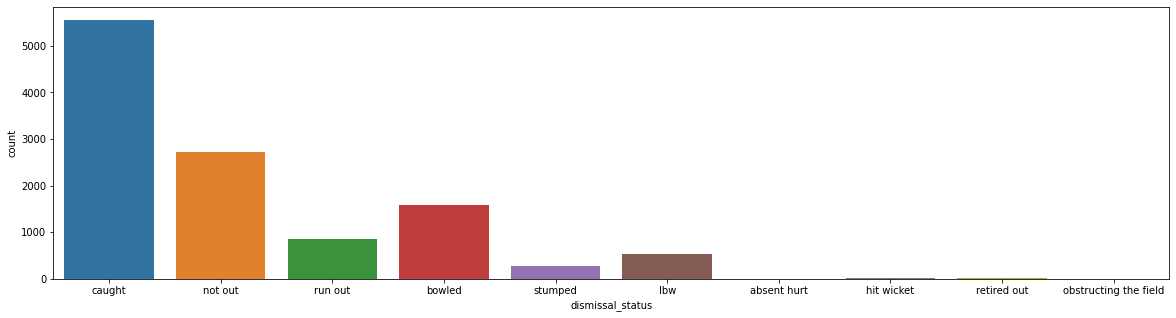

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
plt.figure(figsize=(20,5))
ax = sns.countplot(x="dismissal_status", data=batting_df)

### **Question 8**
* Create a dataframe at a player level. Calculate below mentioned metrics :
  * #50s
  * #100s
  * #4s
  * #6s
  * Average
* Assign below points to the players based on the above metrics and calculate the total points earned : 
  * 1 half century = **5 points**
  * 1 century = **10 points**
  * 1 four = **2 point**
  * 1 six = **4 points**
  * Average > 30 = **20 points**
  * Average < 30 = **10 points**

* Rank the players based on total points earned. Now list down the top 10 batsmen overall across all IPL seasons
------------------


In [ ]:
# write your code here. Feel free to add multiple cells as per your need
df5 = df3
df5['no_of_out'] = 0
for i in df5.index:
  if(df5['wicket_status'][i]=='not_out'):
    df5['no_of_out'][i] = 0
  else:
    df5['no_of_out'][i] = 1
df5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key,no_of_out
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,18-04-2009,2009041801,1
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,18-04-2009,2009041801,1
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,18-04-2009,2009041801,1
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,18-04-2009,2009041801,1
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,18-04-2009,2009041801,1


In [ ]:
df5['century'] = 0
df5['half_century'] = 0
for i in df5.index:
  if(df5['R'][i] >= 100):
    df5['century'][i] = 1
  if((df5['R'][i] >= 50) & (df5['R'][i] < 100)):
    df5['half_century'][i] = 1
df5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key,no_of_out,century,half_century
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,18-04-2009,2009041801,1,0,0
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,18-04-2009,2009041801,1,0,1
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,18-04-2009,2009041801,1,0,0
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,18-04-2009,2009041801,1,0,0
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,18-04-2009,2009041801,1,0,0


In [ ]:
btdf = df5.groupby(['batsmen']).sum()
btdf.head()

,R,B,M,fours,sixes,SR,match_key,no_of_out,century,half_century
batsmen,,,,,,,,,,
A Ashish Reddy,280,193,262,17,14,3163.89,46314025629,23,0,0
A Chandila,4,7,16,0,0,66.66,4025093803,2,0,0
A Chopra,53,71,0,7,0,370.36,12049299209,6,0,0
A Choudhary,25,20,30,1,1,491.66,6051133703,3,0,0
A Dananjaya,4,5,0,0,0,80.00,2018041401,1,0,0


In [ ]:
btdf['average'] = ''
for i in btdf.index:
  btdf['average'][i] = btdf['R'][i]/btdf['no_of_out'][i]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,R,B,M,fours,sixes,SR,match_key,no_of_out,century,half_century,average,total_points
batsmen,,,,,,,,,,,,
A Ashish Reddy,280,193,262,17,14,3163.89,46314025629,23,0,0,12.1739,100
A Chandila,4,7,16,0,0,66.66,4025093803,2,0,0,2,10
A Chopra,53,71,0,7,0,370.36,12049299209,6,0,0,8.83333,24
A Choudhary,25,20,30,1,1,491.66,6051133703,3,0,0,8.33333,16
A Dananjaya,4,5,0,0,0,80.00,2018041401,1,0,0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...
YV Takawale,192,178,115,26,3,1015.79,20111489312,10,0,0,19.2,74
Yashpal Singh,47,66,13,5,0,306.11,8036188007,4,0,0,11.75,20
Younis Khan,3,7,17,0,0,42.85,2008052802,1,0,0,3,10


In [ ]:
btdf['total_points'] = 0
for i in btdf.index:
  btdf['total_points'][i] = (btdf['century'][i] * 10) + (btdf['half_century'][i]*5)+ (btdf['fours'][i]*2) + (btdf['sixes'][i]*4)
  if(btdf['average'][i] >= 30):
    btdf['total_points'][i] += 20
  else:
    btdf['total_points'][i] +=10
btdf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,R,B,M,fours,sixes,SR,match_key,no_of_out,century,half_century,average,total_points
batsmen,,,,,,,,,,,,
A Ashish Reddy,280,193,262,17,14,3163.89,46314025629,23,0,0,12.1739,100
A Chandila,4,7,16,0,0,66.66,4025093803,2,0,0,2,10
A Chopra,53,71,0,7,0,370.36,12049299209,6,0,0,8.83333,24
A Choudhary,25,20,30,1,1,491.66,6051133703,3,0,0,8.33333,16
A Dananjaya,4,5,0,0,0,80.00,2018041401,1,0,0,4,10


In [ ]:
btdf['rank']=btdf['total_points'].rank(ascending=0)
btdf.nlargest(10, ['total_points'])

,R,B,M,fours,sixes,SR,match_key,no_of_out,century,half_century,average,total_points,rank
batsmen,,,,,,,,,,,,,
CH Gayle,4484,2969,3394,368,326,16177.00,249760693458,124,6,28,36.1613,2260,1.0
SK Raina,5368,3915,3645,493,194,22585.81,380569688735,189,1,38,28.4021,1972,2.0
V Kohli,5412,4112,4225,480,190,20030.77,340294707610,169,5,36,32.0237,1970,3.0
DA Warner,4706,3305,3929,458,181,15653.18,253769743860,126,4,44,37.3492,1920,4.0
RG Sharma,4898,3744,3665,431,194,20495.90,368484412030,183,1,36,26.765,1838,5.0
AB de Villiers,4395,2906,2867,357,212,18819.50,285968508776,142,3,33,30.9507,1777,6.0
S Dhawan,4579,3669,3987,524,96,17638.07,318227275701,158,0,37,28.981,1627,7.0
RV Uthappa,4411,3380,3423,435,156,20213.99,340282686520,170,0,24,25.9471,1624,8.0
MS Dhoni,4432,3215,3009,297,209,21878.36,342311851811,170,0,23,26.0706,1555,9.0


### **Question 9**
* Look for a column called **Special_role** to denote if a player is captain or not. 
* **Filter** the dataframe based on if a player is a captain.
* Pick all the innings by the captains (For **IPL 2017**) and plot a **box and whiskers plot** of **%run_contribution** per captain
  * Which captain do you think has played **captain's knock** most of the times? (purely going by % contribution to scorecard for now)
------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A val

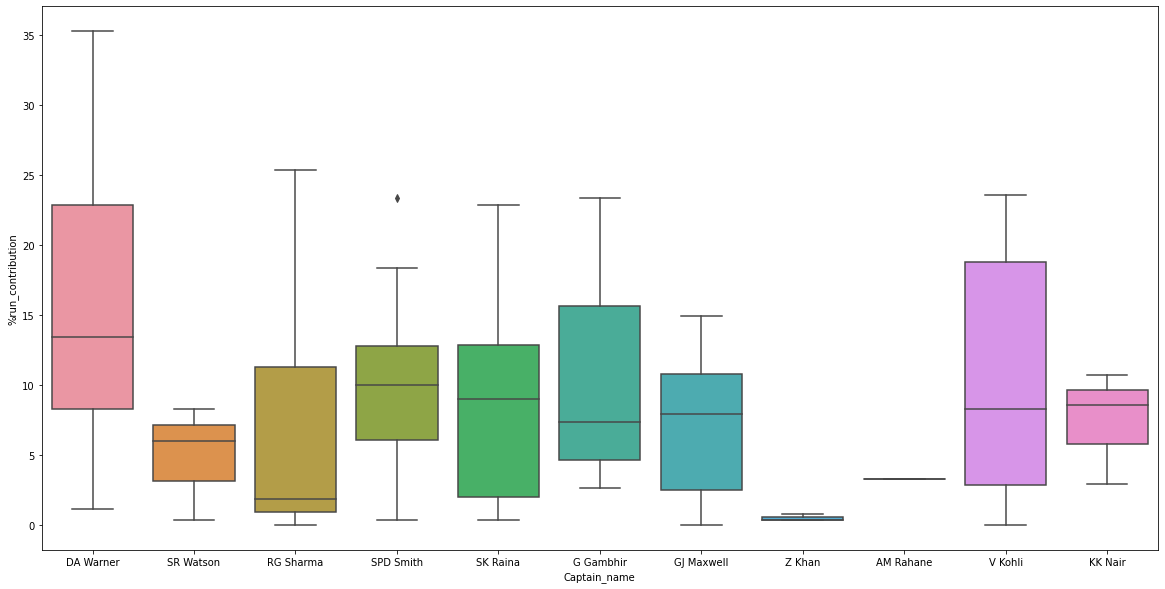

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
df3['captain'] = 'default'
for i in df3.index:
  if ((df3['special_role'][i] == 'captain') | (df3['special_role'][i] == 'captain & wicket keeper')):
    df3['captain'][i] = 1 
  else:
    df3['captain'][i] = 0
df3['Year'] = pd.DatetimeIndex(df3['match_date']).year
df3['Month'] = pd.DatetimeIndex(df3['match_date']).month
df3['Day'] = pd.DatetimeIndex(df3['match_date']).day
runs = pd.DataFrame(index=range(0,102),columns=['Runs','Captain_name','key','match_runs','%run_contribution'])
j=0
k=0
#total_runs = df3.groupby(['captain','Year','batsmen'])['R'].sum()
#for i in total_runs.index:
 # if((total_runs['Year'][i]==2019) & (total_runs['captain'][i]==1)):
  #  runs.append(total_runs[i])

#print(total_runs)
for i in df3.index:
  if((df3['captain'][i] == 1) & (df3['Year'][i]==2017) ):
    runs['Runs'][j] = df3['R'][i]
    runs['Captain_name'][j] = df3['batsmen'][i]
    runs['key'][j] = df3['match_key'][i]
    j+=1 
runs['match_runs'] = 0
for i in runs.index:
  for j in df3.index:
    if(df3['match_key'][j]==runs['key'][i]):
      runs['match_runs'][i] += df3['R'][j]
#runs['%run_contribution'] = 0
for i in runs.index:
  runs['%run_contribution'][i] = runs['Runs'][i]/runs['match_runs'][i] * 100
#print(runs)
#total_runs = runs.groupby('Captain_name')['Runs'].sum()
#total_runs.sort_values(ascending=False,inplace=True)
#match_runs = runs.groupby('Captain_name')['match_runs'].sum()
#print(match_runs)

#gr_c = newdf.groupby('name').sum()
#gr_c.head()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="Captain_name", y="%run_contribution", data=runs)

Captain DA Warner tops the chart.

### **Question 10**
* Is IPL more in favor of batsmen?
* Let's consider two metrics **total_runs** made in a match and the **run_rate** of the match
* Create a **histogram** of **total_runs** by match. What kind of a **distribution** your discover?
* **Repeat** the above step for **run_rate** per match too
* Is the distribution **left skewed** or **right skewed**?
* Discuss your insights

------------------

In [ ]:
df3 = pd.read_csv('/gdrive/My Drive/data/ipl_batting.csv')

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
bdf = df3.groupby(['match_key']).sum()
print(bdf)


               R    B    M  fours  sixes       SR
match_key                                        
-1           286  240  378     21     15  1990.56
 2008041801  268  211    0     18     17  1340.13
 2008041901  430  241    0     38     25  2041.62
 2008041902  244  211    0     32      4  1505.21
 2008042001  184  229    0     11     10  1122.81
...          ...  ...  ...    ...    ...      ...
 2019050502  254  219  362     17     15   998.09
 2019050701  250  234  384     25      5  1150.61
 2019050801  311  240  438     26     16  1971.12
 2019051001  279  235  396     27      9  2027.19
 2019051201  285  240  213     20     15  1621.14

[756 rows x 6 columns]


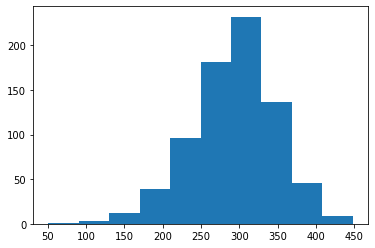

-0.40512476875346237


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import skew
plt.hist(bdf['R'], bins=10)
plt.show()
print(skew(bdf['R']))

Above graph is skewed left that is negatively skewed

In [ ]:
bdf['overs'] = ''
for i in bdf.index:
  bdf['overs'][i] = (bdf['B'][i]/6)
bdf['run_rate'] = ''
for i in bdf.index:
  bdf['run_rate'][i] = bdf['R'][i]/bdf['overs'][i]
bdf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,R,B,M,fours,sixes,SR,overs,run_rate
match_key,,,,,,,,
-1,286,240,378,21,15,1990.56,40,7.15
2008041801,268,211,0,18,17,1340.13,35.1667,7.62085
2008041901,430,241,0,38,25,2041.62,40.1667,10.7054
2008041902,244,211,0,32,4,1505.21,35.1667,6.93839
2008042001,184,229,0,11,10,1122.81,38.1667,4.82096


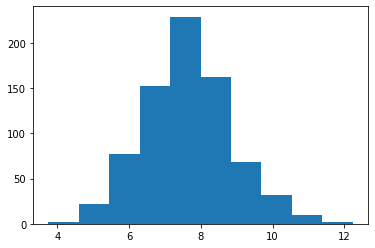

0.20508060455721733


In [ ]:
plt.hist(bdf['run_rate'], bins=10)
plt.show()
print(skew(bdf['run_rate']))

Above graph is skewed right that is positively skewed

### **Question 11**
* **Filter** the histogram (created in **Question 10**) for an **IPL season**. Ex. IPL 2016
* Also, filter the histogram for a **team** within a **season**. Ex. for CSK within IPL 2016
* **Describe** your observations. Think along the following **questions** : 
  * What is the meaning of **skewness**?
  * Is there an **observable difference** between the **rate of runs** scored for some teams over others?
    * Choose appropriate **visualization** to understand **run_rate** of teams (**Hint :** Violin charts)
    * Which teams are strong at making **large quantity** of runs?
    * Which teams are strong at making runs at a **quicker rate**? (Consider run a ball the **base line** for **under** or **over** indexing teams)

* **Note :** *A metric is said to be under-indexed when it's value is less than the baseline value. Similarly it is said to be over-indexed when it's value is more than the baseline value*

-------------------------
    

In [145]:
# write your code here. Feel free to add multiple cells as per your need
# write your code here. Feel free to add multiple cells as per your nee
dil = pd.read_csv('/gdrive/My Drive/data/ipl_deliveries.csv')

In [146]:
dil['Match_id'] = dil['Match_id'].astype(str)

In [147]:
#d12['year'] = ''
#for i in d12.index:
dil['year'] = dil['Match_id'].str[:4]
dil.head()

,Match_id,City,Innings,Winner,Team,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved,file_name,year
0,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.1,DA Warner,KW Richardson,S Dhawan,0,0,NaN,0,NaN,NaN,NaN,980953.yaml,2016
1,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.2,DA Warner,KW Richardson,S Dhawan,4,0,NaN,4,NaN,NaN,NaN,980953.yaml,2016
2,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.3,DA Warner,KW Richardson,S Dhawan,1,0,NaN,1,NaN,NaN,NaN,980953.yaml,2016
3,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.4,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN,980953.yaml,2016
4,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.5,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN,980953.yaml,2016


In [148]:
dil['Delivery'] = 1

In [149]:
d11 = dil[dil['year']=='2016']

In [150]:
d11 = d11.groupby(['Team']).sum().reset_index()

In [151]:
d11['RR'] = d11.apply(lambda row: round((row.Runs_total)/(row.Delivery/6),2),axis=1)

In [153]:
d11 = d11[['Team','RR','Runs_total']]
d11.head()

,Team,RR,Runs_total
0,Delhi Daredevils,7.67,2104
1,Gujarat Lions,7.77,2450
2,Kings XI Punjab,7.71,2134
3,Kolkata Knight Riders,8.01,2263
4,Mumbai Indians,7.86,2194


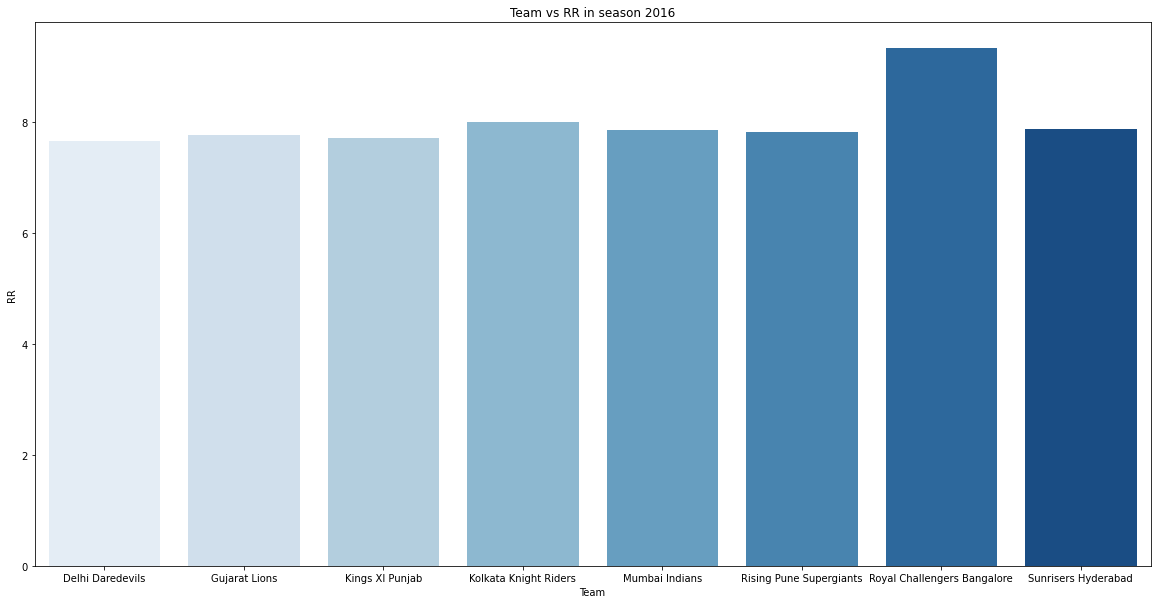

In [154]:
plt.figure(figsize=(20,10))
plt.title('Team vs RR in season 2016')
sns.barplot(x=d11['Team'],y=d11['RR'],palette="Blues")

Royal Challenger Bangalore made a large quantity of runs standing highest for ipl season 2016. Sunrisers Hyderabad stand second for scoring large quantity of runs.

### **Question 12**
* Calculate a metric **%fast_innings**. This would be percentage of innings where run_rate is more than base_line run rate of **6.0 per over**
    * Which team are top 3 teams by **%fast_innings**?
    * What insights do you have about the teams against %fast_innings?
* Let's now think of how **fast** or **slow** the run was made.
  * We will create a metric which would be an indicator of speed. Let's create a metric called **dist_base_line** which means **innings_run_rate - 6.0**.
  * A **negative** value would mean slow run_rate and **positive** would mean fast. The value would mean the **intensity**. (We can say a value of 3.6-6 = -2.4 means a very slow run rate. Which a value of 10.2-6 = 3.6 as a very fast run rate)
  * For a team (chose any of your choice), visualize the distribution of negative values and do the same for positive ones. 
  * Do you find skewness? If yes, how strong is it. Discuss the interesting cases.
* Are there instances where teams are making lots of runs at a very fast pace?
  * Create a **scatter-plot** with **runs_made** on x-axis and **run_rate** on y-axis. 
  * The **color** of the dots should correspond to the team color
  * Discuss the **insights** derived. Are there teams really dominating the run making?

---------------------------

In [100]:
# write your code here. Feel free to add multiple cells as per your need
# write your code here. Feel free to add multiple cells as per your nee
d12 = pd.read_csv('/gdrive/My Drive/data/ipl_deliveries.csv')

In [101]:
d12['Match_id'] = d12['Match_id'].astype(str)

In [102]:
#d12['year'] = ''
#for i in d12.index:
d12['year'] = d12['Match_id'].str[:4]
d12.head()

,Match_id,City,Innings,Winner,Team,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved,file_name,year
0,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.1,DA Warner,KW Richardson,S Dhawan,0,0,NaN,0,NaN,NaN,NaN,980953.yaml,2016
1,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.2,DA Warner,KW Richardson,S Dhawan,4,0,NaN,4,NaN,NaN,NaN,980953.yaml,2016
2,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.3,DA Warner,KW Richardson,S Dhawan,1,0,NaN,1,NaN,NaN,NaN,980953.yaml,2016
3,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.4,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN,980953.yaml,2016
4,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.5,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN,980953.yaml,2016


In [103]:
d12 = d12.groupby(['Match_id','year','Team','Innings']).sum().reset_index()

In [104]:
d12.head()

,Match_id,year,Team,Innings,Over,Delivery,runs_batsman,runs_extras,Runs_total
0,2008041801,2008,Kolkata Knight Riders,1,1293,1213.8,205,17,222
1,2008041801,2008,Royal Challengers Bangalore,2,826,763.3,63,19,82
2,2008041901,2008,Chennai Super Kings,1,1291,1211.9,234,6,240
3,2008041901,2008,Kings XI Punjab,2,1295,1215.9,196,11,207
4,2008041902,2008,Delhi Daredevils,2,790,728.8,122,10,132


In [105]:
d12['RR'] = d12.apply(lambda row: round((row.Runs_total)/(row.Delivery/6),2),axis=1)

In [106]:
d12['dist_base_line'] = d12['RR']-6

In [108]:
tlist = d12['Team'].unique().tolist()

In [109]:
dobj = pd.DataFrame(columns=['team','total_innings','fast_innings','%fast_innings'])

In [114]:
for x in tlist:
  tot_inn = len(d12[d12['Team'] == x])
  fast_inn = len(d12[(d12['Team'] == x) & (d12['RR'] > 6)])
  fast = round((fast_inn*100)/tot_inn,2) 
  dobj = dobj.append({'team': x,'total_innings': tot_inn,'fast_innings': fast_inn,'%fast_innings': fast},ignore_index=True)

In [115]:
dobj = dobj.sort_values(by = '%fast_innings',ascending=False)
dobj.head()

,team,total_innings,fast_innings,%fast_innings
0,Gujarat Lions,31,1,3.23
26,Gujarat Lions,31,1,3.23
19,Rajasthan Royals,120,3,2.50
1,Rajasthan Royals,120,3,2.50
2,Delhi Daredevils,148,1,0.68


In [116]:
df12 = d12[d12['Team']=='Mumbai Indians']

In [117]:
df12n = df12[df12['dist_base_line']<=0]
df12p = df12[df12['dist_base_line']>0]

Text(0.5, 1.0, 'Comparing dist_base_line of Mumbai Indians')

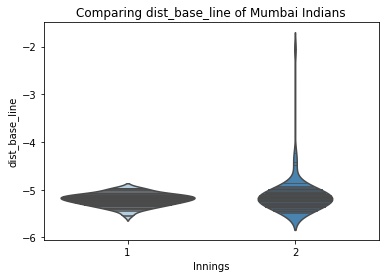

In [118]:
sns.violinplot(x=df12n['Innings'], y=df12n['dist_base_line'],palette="Blues",inner = 'stick').set_title('Comparing dist_base_line of Mumbai Indians')

From above graph, Mumbai Indians have RR less than baseline

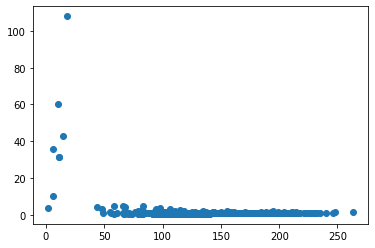

In [131]:
plt.scatter(d12.Runs_total, d12.RR)

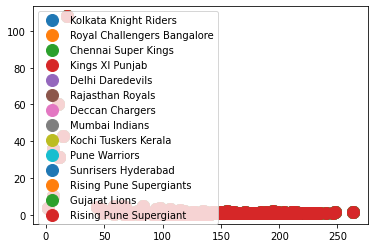

In [158]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name in d12['Team'].unique():
  ax.plot(d12['Runs_total'], d12['RR'], marker='o', linestyle='', ms=12,label = name)
ax.legend()

plt.show()

### **Question 13**
* Let's analyze whether higher run_rate lead to victory?
* Create a visualization to analyze run_rates of teams in matches which it won against the ones it lost. (Hint : Box plots)
* Discuss your insights :
  * Is there a team which is really winning based on a higher run_rate maintained by them?
  * Think about a **statistical test of significance** which can help you evaluate the hypothesis mentioned in the 1st point.
    * **Reference 1 :** [Understanding the tests of significance](https://towardsdatascience.com/statistical-significance-hypothesis-testing-the-normal-curve-and-p-values-93274fa32687)
    * **Reference 2 :** [When to apply what?](https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740)
    * **Reference 3 :** [Understanding T-test](https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29)
  * **(Optional)**. Implement the test and explain your result

------------------

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
deliveries_df = pd.read_csv('/gdrive/My Drive/data/ipl_deliveries.csv')

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
ball_count = deliveries_df.groupby(['Match_id','Winner', 'Team'])
bc1 = ball_count['Delivery'].count()
bc1

Match_id    Winner                 Team                       
2008041801  Kolkata Knight Riders  Kolkata Knight Riders          124
                                   Royal Challengers Bangalore    101
2008041901  Chennai Super Kings    Chennai Super Kings            124
                                   Kings XI Punjab                124
2008041902  Delhi Daredevils       Delhi Daredevils                97
                                                                 ... 
2017051701  Kolkata Knight Riders  Sunrisers Hyderabad            122
2017051901  Mumbai Indians         Kolkata Knight Riders          116
                                   Mumbai Indians                  91
2017052101  Mumbai Indians         Mumbai Indians                 125
                                   Rising Pune Supergiant         123
Name: Delivery, Length: 1266, dtype: int64

In [ ]:
ball_count = deliveries_df.groupby(['Match_id','Winner', 'Team'])
rc1 = ball_count['Runs_total'].mean()
rc1

Match_id    Winner                 Team                       
2008041801  Kolkata Knight Riders  Kolkata Knight Riders          1.790323
                                   Royal Challengers Bangalore    0.811881
2008041901  Chennai Super Kings    Chennai Super Kings            1.935484
                                   Kings XI Punjab                1.669355
2008041902  Delhi Daredevils       Delhi Daredevils               1.360825
                                                                    ...   
2017051701  Kolkata Knight Riders  Sunrisers Hyderabad            1.049180
2017051901  Mumbai Indians         Kolkata Knight Riders          0.922414
                                   Mumbai Indians                 1.219780
2017052101  Mumbai Indians         Mumbai Indians                 1.032000
                                   Rising Pune Supergiant         1.040650
Name: Runs_total, Length: 1266, dtype: float64

In [ ]:
dic_wonwith = defaultdict(list)
dic_lostwith = defaultdict(list)

dic_wonagainst = defaultdict(list)
dic_lostagainst = defaultdict(list)

In [ ]:
for val in rc1.iteritems():
  if val[0][1] != val[0][2]:
    dic_wonagainst[val[0][1]].append(val[1]*6)
    dic_lostwith[val[0][2]].append(val[1]*6)
  else:
    dic_wonwith[val[0][2]].append(val[1]*6) 

  for x in rc1.iteritems():
    if x[0][1] == x[0][2] and x[0][0] == val[0][0]:
      dic_lostagainst[val[0][2]].append(x[1]*6)
      break

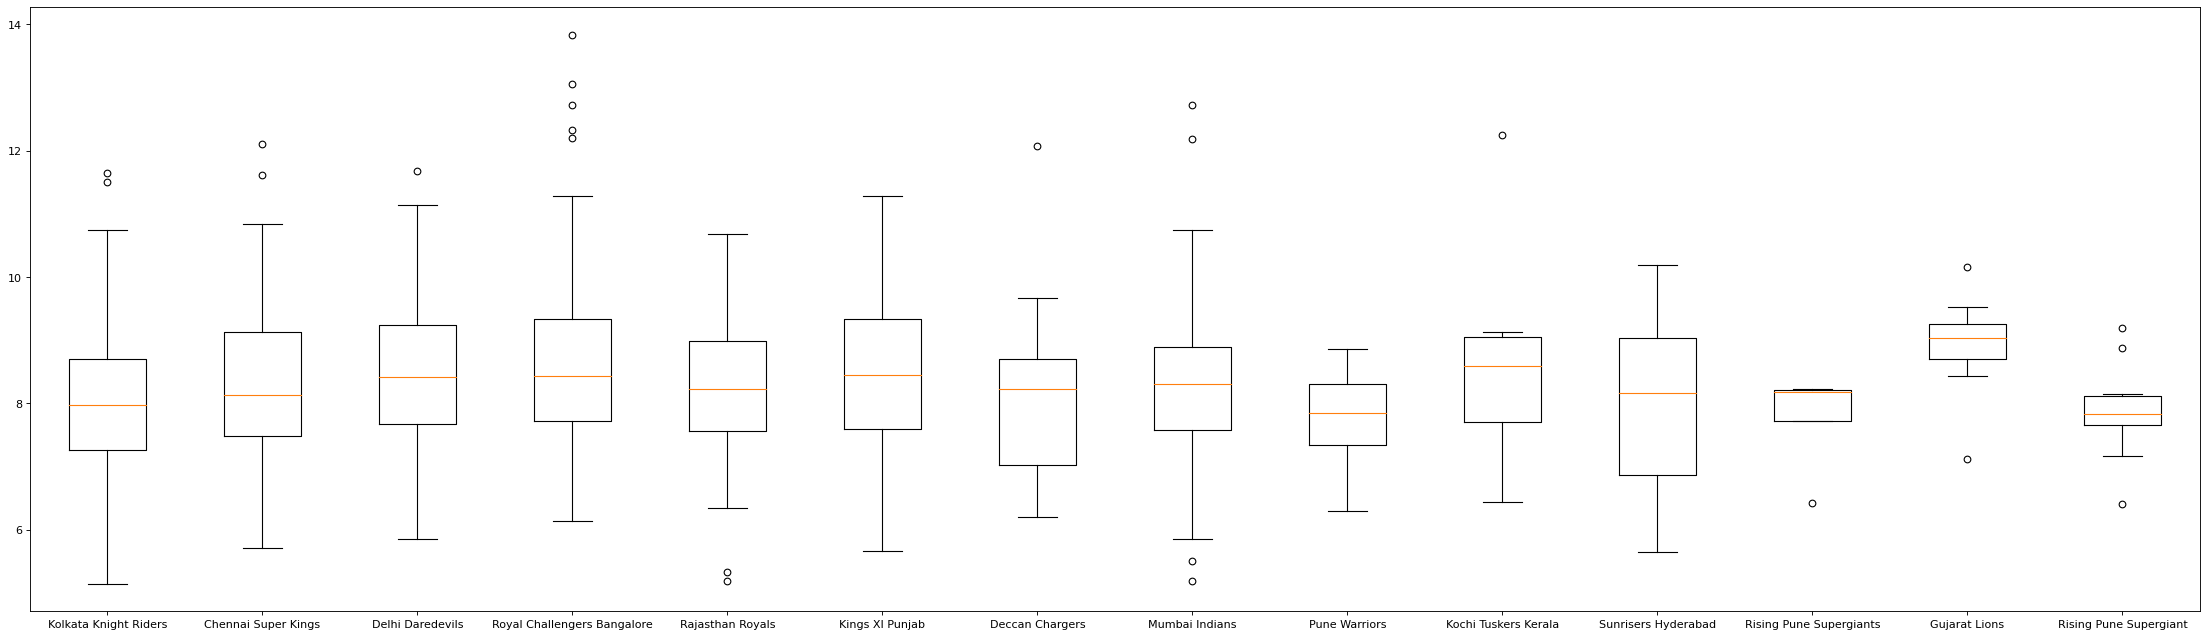

In [ ]:
labels, data = [*zip(*dic_wonwith.items())]  # 'transpose' items to parallel key, value lists

plt.figure(num=None, figsize=(35, 10), dpi=80, facecolor='w', edgecolor='k')
# or backwards compatable

plt.boxplot(data)
# pyplot.set_size(18.5, 10.5)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

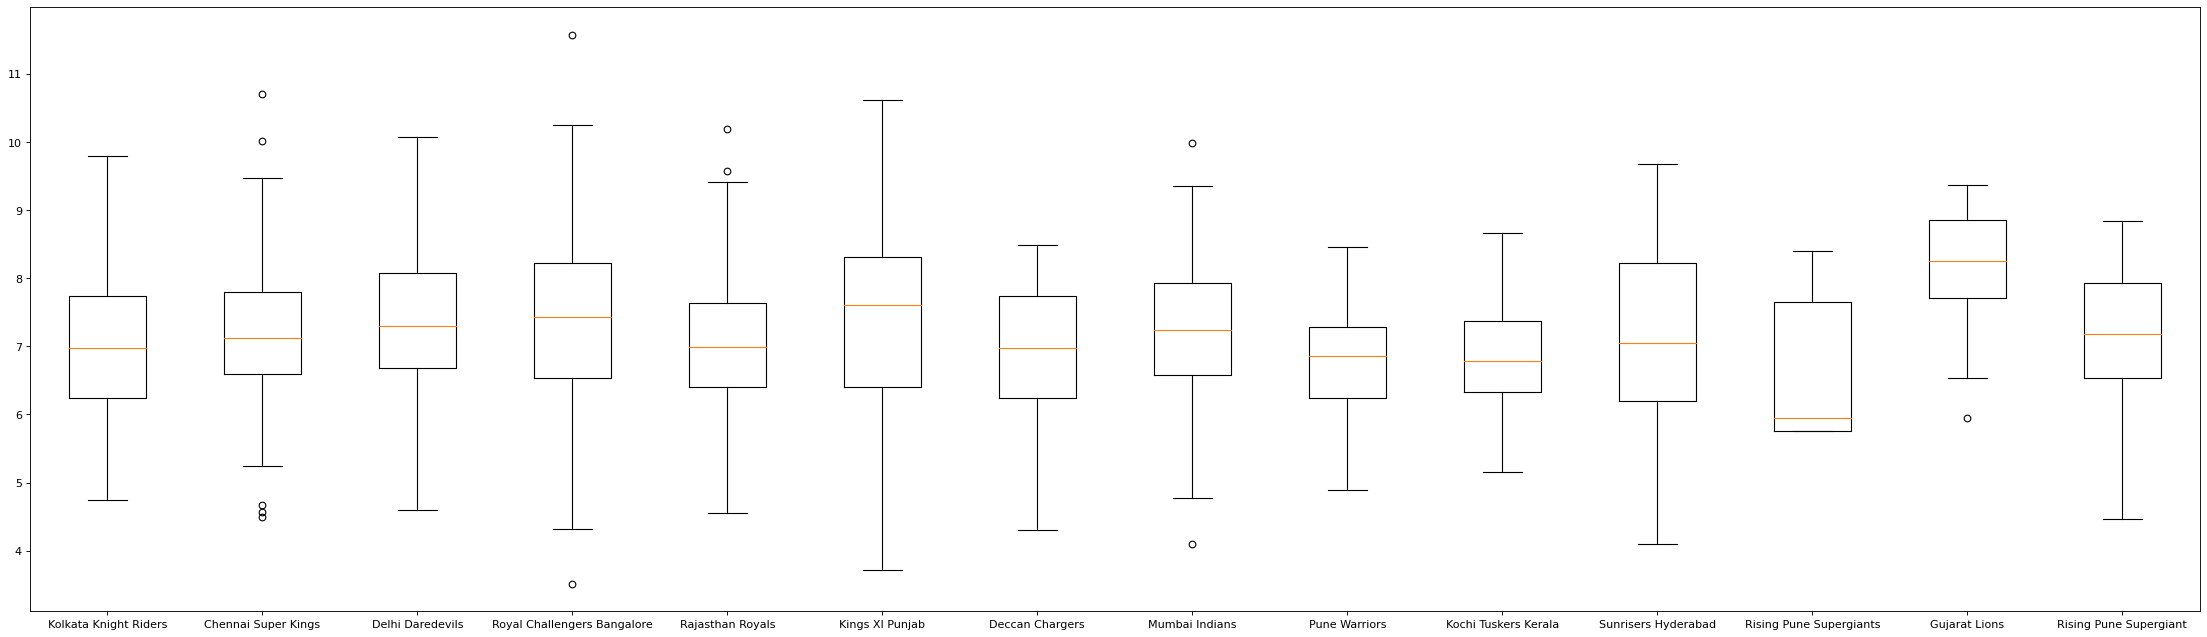

In [ ]:
labels, data = [*zip(*dic_wonagainst.items())]  # 'transpose' items to parallel key, value lists

plt.figure(num=None, figsize=(35, 10), dpi=80, facecolor='w', edgecolor='k')
# or backwards compatable

plt.boxplot(data)
# pyplot.set_size(18.5, 10.5)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

In [ ]:
gr_team = deli.groupby(['Match_id','Team']).sum()
gr_team.head()

Innings  Over  ...  runs_extras  Runs_total
Match_id   Team                                        ...                         
2008041801 Kolkata Knight Riders            124  1293  ...           17         222
           Royal Challengers Bangalore      202   826  ...           19          82
2008041901 Chennai Super Kings              124  1291  ...            6         240
           Kings XI Punjab                  248  1295  ...           11         207
2008041902 Delhi Daredevils                 194   790  ...           10         132

[5 rows x 6 columns]

In [ ]:
gr_team['run_rate'] = ''
for i in gr_team.index:
  gr_team['run_rate'][i] = gr_team['Runs_total'][i]/gr_team['Over'][i]
gr_team.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Innings  Over  ...  Runs_total   run_rate
Match_id   Team                                        ...                       
2008041801 Kolkata Knight Riders            124  1293  ...         222   0.171694
           Royal Challengers Bangalore      202   826  ...          82  0.0992736
2008041901 Chennai Super Kings              124  1291  ...         240   0.185902
           Kings XI Punjab                  248  1295  ...         207   0.159846
2008041902 Delhi Daredevils                 194   790  ...         132   0.167089

[5 rows x 7 columns]

In [ ]:
team = pd.DataFrame(gr_team).reset_index()
team.head()

,Match_id,Team,Innings,Over,Delivery,runs_batsman,runs_extras,Runs_total,run_rate
0,2008041801,Kolkata Knight Riders,124,1293,1213.8,205,17,222,0.171694
1,2008041801,Royal Challengers Bangalore,202,826,763.3,63,19,82,0.0992736
2,2008041901,Chennai Super Kings,124,1291,1211.9,234,6,240,0.185902
3,2008041901,Kings XI Punjab,248,1295,1215.9,196,11,207,0.159846
4,2008041902,Delhi Daredevils,194,790,728.8,122,10,132,0.167089


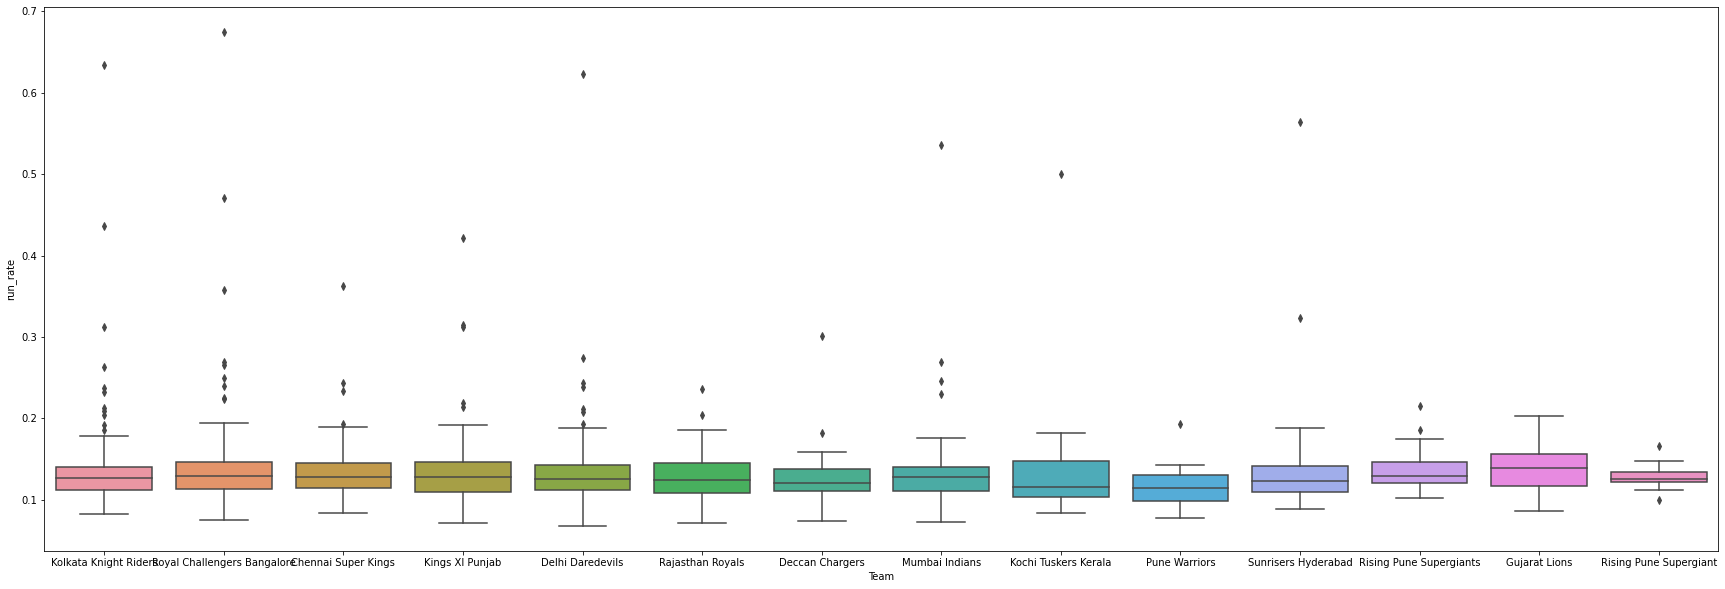

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
ax = sns.boxplot(x=team['Team'], y=team['run_rate'], data=team)

### **Question 14**
* **Virat Kohli** is known to be a **master chaser**. Is it so? Let's validate through raw data
* Visualize the runs made by Virat Kohli in matches where his team played the **1st innings** (Hint : Use histograms)
* Visualize the runs made by Virat Kohli in matches where his team played the **2nd innings**. (Note : the 2 histograms should be plotted in the same figure)
* Interpret the histograms. Do they look cleanly **separated**?
* Create a **1X2** subplot : 
  * In subplot **(1,1)** plot the two histograms for the matches which his team won
  * In subplot **(1,2)** plot the two histograms for the matches which his team lost
  * **Discuss** your findings
    * Has Kohli been a great chaser **only** in matches won?
* Calculate Kohli's **run contribution(%)** for all matches played by him
  * Draw a violin plot of his **run_contribution(%)** for two categories : 
    * Matches **won** by his team
    * Matches **lost** by his team
  * Draw a **scatter plot** showing **run_contribution(%)** on **X-axis** and **strike_rate** on **y-axis**. Define **color** of dots as : 
    * **Green :** For matches won
    * **Red :** For matches lost
  * Discuss your insights. Do you think he has been playing captain's innings?


In [57]:
# write your code here. Feel free to add multiple cells as per your nee
deliveries_df = pd.read_csv('/gdrive/My Drive/data/ipl_deliveries.csv')

In [67]:
kohli = deliveries_df[deliveries_df['Batsman']=='V Kohli']

,Match_id,City,Innings,Winner,Team,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved,file_name
124,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0.1,V Kohli,A Nehra,KL Rahul,1,0,NaN,1,NaN,NaN,NaN,980953.yaml
128,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0.5,V Kohli,A Nehra,KL Rahul,1,0,NaN,1,NaN,NaN,NaN,980953.yaml
133,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1.4,V Kohli,B Kumar,KL Rahul,0,0,NaN,0,NaN,NaN,NaN,980953.yaml
134,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1.5,V Kohli,B Kumar,KL Rahul,1,0,NaN,1,NaN,NaN,NaN,980953.yaml
136,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,3,2.1,V Kohli,A Nehra,KL Rahul,0,0,NaN,0,NaN,NaN,NaN,980953.yaml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148415,2013051001,Delhi,1,Royal Challengers Bangalore,Royal Challengers Bangalore,20,19.2,V Kohli,UT Yadav,AB de Villiers,4,0,NaN,4,NaN,NaN,NaN,598054.yaml
148416,2013051001,Delhi,1,Royal Challengers Bangalore,Royal Challengers Bangalore,20,19.3,V Kohli,UT Yadav,AB de Villiers,4,0,NaN,4,NaN,NaN,NaN,598054.yaml
148417,2013051001,Delhi,1,Royal Challengers Bangalore,Royal Challengers Bangalore,20,19.4,V Kohli,UT Yadav,AB de Villiers,6,0,NaN,6,NaN,NaN,NaN,598054.yaml
148418,2013051001,Delhi,1,Royal Challengers Bangalore,Royal Challengers Bangalore,20,19.5,V Kohli,UT Yadav,AB de Villiers,6,0,NaN,6,NaN,NaN,NaN,598054.yaml


In [79]:
kohli['win'] = 0
for i in kohli.index:
  if(kohli['Winner'][i] == 'Royal Challengers Bangalore' ):
    kohli['win'][i] = 1
  else:
    kohli['win'][i] = 0
kohli

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,Match_id,City,Innings,Winner,Team,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved,file_name,win
124,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0.1,V Kohli,A Nehra,KL Rahul,1,0,NaN,1,NaN,NaN,NaN,980953.yaml,0
128,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0.5,V Kohli,A Nehra,KL Rahul,1,0,NaN,1,NaN,NaN,NaN,980953.yaml,0
133,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1.4,V Kohli,B Kumar,KL Rahul,0,0,NaN,0,NaN,NaN,NaN,980953.yaml,0
134,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1.5,V Kohli,B Kumar,KL Rahul,1,0,NaN,1,NaN,NaN,NaN,980953.yaml,0
136,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,3,2.1,V Kohli,A Nehra,KL Rahul,0,0,NaN,0,NaN,NaN,NaN,980953.yaml,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148415,2013051001,Delhi,1,Royal Challengers Bangalore,Royal Challengers Bangalore,20,19.2,V Kohli,UT Yadav,AB de Villiers,4,0,NaN,4,NaN,NaN,NaN,598054.yaml,1
148416,2013051001,Delhi,1,Royal Challengers Bangalore,Royal Challengers Bangalore,20,19.3,V Kohli,UT Yadav,AB de Villiers,4,0,NaN,4,NaN,NaN,NaN,598054.yaml,1
148417,2013051001,Delhi,1,Royal Challengers Bangalore,Royal Challengers Bangalore,20,19.4,V Kohli,UT Yadav,AB de Villiers,6,0,NaN,6,NaN,NaN,NaN,598054.yaml,1
148418,2013051001,Delhi,1,Royal Challengers Bangalore,Royal Challengers Bangalore,20,19.5,V Kohli,UT Yadav,AB de Villiers,6,0,NaN,6,NaN,NaN,NaN,598054.yaml,1


In [80]:
kfirst  = kohli[kohli['Innings'] == 1]
kfirst.head()

,Match_id,City,Innings,Winner,Team,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved,file_name,win
5490,2013042901,Jaipur,1,Rajasthan Royals,Royal Challengers Bangalore,5,4.2,V Kohli,JP Faulkner,A Mukund,0,0,NaN,0,NaN,NaN,NaN,598036.yaml,0
5491,2013042901,Jaipur,1,Rajasthan Royals,Royal Challengers Bangalore,5,4.3,V Kohli,JP Faulkner,A Mukund,0,1,LEGBYES,1,NaN,NaN,NaN,598036.yaml,0
5493,2013042901,Jaipur,1,Rajasthan Royals,Royal Challengers Bangalore,5,4.5,V Kohli,JP Faulkner,A Mukund,1,0,NaN,1,NaN,NaN,NaN,598036.yaml,0
5496,2013042901,Jaipur,1,Rajasthan Royals,Royal Challengers Bangalore,6,5.1,V Kohli,SR Watson,A Mukund,0,0,NaN,0,NaN,NaN,NaN,598036.yaml,0
5497,2013042901,Jaipur,1,Rajasthan Royals,Royal Challengers Bangalore,6,5.2,V Kohli,SR Watson,A Mukund,1,0,NaN,1,NaN,NaN,NaN,598036.yaml,0


In [81]:
ksecond = kohli[kohli['Innings'] == 2]
ksecond.head()

,Match_id,City,Innings,Winner,Team,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved,file_name,win
124,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0.1,V Kohli,A Nehra,KL Rahul,1,0,NaN,1,NaN,NaN,NaN,980953.yaml,0
128,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0.5,V Kohli,A Nehra,KL Rahul,1,0,NaN,1,NaN,NaN,NaN,980953.yaml,0
133,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1.4,V Kohli,B Kumar,KL Rahul,0,0,NaN,0,NaN,NaN,NaN,980953.yaml,0
134,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1.5,V Kohli,B Kumar,KL Rahul,1,0,NaN,1,NaN,NaN,NaN,980953.yaml,0
136,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,3,2.1,V Kohli,A Nehra,KL Rahul,0,0,NaN,0,NaN,NaN,NaN,980953.yaml,0


In [83]:
kfirst_runs = kfirst.groupby(kfirst['Match_id']).agg('sum')

In [82]:
ksecond_runs = ksecond.groupby(ksecond['Match_id']).agg('sum')
ksecond_runs.head()

,Innings,Over,Delivery,runs_batsman,runs_extras,Runs_total,win
Match_id,,,,,,,
2008041801,10,12,8.2,1,4,5,0
2008042002,30,188,177.8,23,1,24,15
2008042801,14,116,111.8,12,0,12,0
2008043001,2,20,19.3,1,0,1,0
2008051701,16,16,10.7,3,1,4,0


(array([[15., 15.,  8.,  5.,  4.,  9.,  5.,  2.,  2.,  2.],
        [20., 18.,  9., 14.,  7.,  3.,  2.,  0.,  1.,  1.]]),
 array([  0. ,  11.6,  23.2,  34.8,  46.4,  58. ,  69.6,  81.2,  92.8,
        104.4, 116. ]),
 <a list of 2 Lists of Patches objects>)

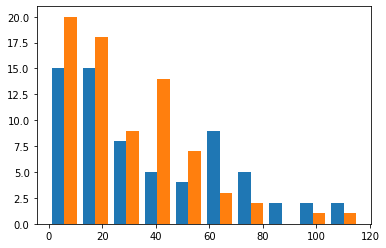

In [91]:
first = kfirst_runs['Runs_total']
legend = ['1st innings','2nd innings']
second = ksecond_runs['Runs_total']
plt.hist([first,second])

In [86]:
kfirst_wins = kfirst_runs[kfirst_runs['win']!=0]

In [87]:
kfirst_loss = kfirst_runs[kfirst_runs['win']==0]

In [88]:
ksecond_wins = ksecond_runs[ksecond_runs['win']!=0]
ksecond_loss = ksecond_runs[ksecond_runs['win']==0]

Text(0.5, 1.0, 'Loss Summary')

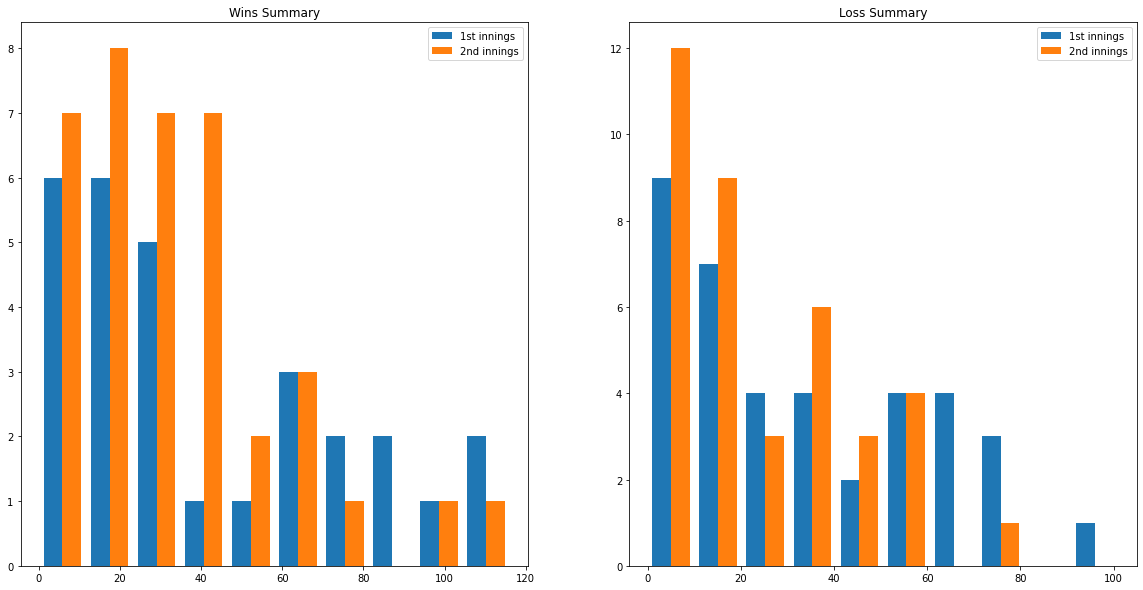

In [90]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
fir = kfirst_wins['Runs_total']
legend = ['1st innings','2nd innings']
sec = ksecond_wins['Runs_total']
ax1.hist([fir,sec])
ax1.legend(legend)
ax1.set_title("Wins Summary")
fir1 = kfirst_loss['Runs_total']
sec1 = ksecond_loss['Runs_total']
ax2.hist([fir1,sec1])
ax2.legend(legend)
ax2.set_title("Loss Summary")

In [162]:
grp = deliveries_df.groupby('Match_id').agg('sum').reset_index()
grp['match_runs'] = grp['Runs_total']
grp.head()

,Match_id,Innings,Over,Delivery,runs_batsman,runs_extras,Runs_total,match_runs
0,2008041801,326,2119,1977.1,268,36,304,304
1,2008041901,372,2586,2427.8,430,17,447,447
2,2008041902,316,2064,1924.2,244,17,261,261
3,2008042001,362,2376,2225.0,184,38,222,222
4,2008042002,369,2566,2408.4,315,16,331,331


In [164]:
kohli['match_runs'] = 0
for i in grp.index:
  for j in kohli.index:
    if(kohli['Match_id'][j]==grp['Match_id'][i]):
      kohli['match_runs'][j] = grp['match_runs'][i]
kohli.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,Match_id,City,Innings,Winner,Team,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved,file_name,win,match_runs
124,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0.1,V Kohli,A Nehra,KL Rahul,1,0,NaN,1,NaN,NaN,NaN,980953.yaml,0,373
128,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0.5,V Kohli,A Nehra,KL Rahul,1,0,NaN,1,NaN,NaN,NaN,980953.yaml,0,373
133,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1.4,V Kohli,B Kumar,KL Rahul,0,0,NaN,0,NaN,NaN,NaN,980953.yaml,0,373
134,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1.5,V Kohli,B Kumar,KL Rahul,1,0,NaN,1,NaN,NaN,NaN,980953.yaml,0,373
136,2016043001,Hyderabad,2,Sunrisers Hyderabad,Royal Challengers Bangalore,3,2.1,V Kohli,A Nehra,KL Rahul,0,0,NaN,0,NaN,NaN,NaN,980953.yaml,0,373


In [175]:

kruns = kohli.groupby(['Match_id','match_runs','Innings']).agg('sum').reset_index()

In [176]:
kruns.head()

,Match_id,match_runs,Innings,Over,Delivery,runs_batsman,runs_extras,Runs_total,win
0,2008041801,304,2,12,8.2,1,4,5,0
1,2008042002,331,2,188,177.8,23,1,24,15
2,2008042601,273,1,134,124.6,13,2,15,0
3,2008042801,343,2,116,111.8,12,0,12,0
4,2008043001,372,2,20,19.3,1,0,1,0


In [177]:
kwins = kruns[kruns['win']!=0]
kloss = kruns[kruns['win']==0]

In [178]:
kwins['%run_contribution'] = float(0)
for i in kwins.index:
  kwins['%run_contribution'][i] = (kwins['Runs_total'][i]*100)/kwins['match_runs'][i]
kwins.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

,Match_id,match_runs,Innings,Over,Delivery,runs_batsman,runs_extras,Runs_total,win,%run_contribution
1,2008042002,331,2,188,177.8,23,1,24,15,7.250755
5,2008050301,309,1,268,248.2,38,2,40,31,12.944984
9,2008052102,238,1,99,88.5,10,2,12,17,5.042017
10,2008052501,336,2,86,82.9,9,1,10,5,2.976190
12,2009041802,502,1,86,81.5,3,0,3,8,0.597610


In [181]:
kloss['%run_contribution'] = float(0)
for i in kloss.index:
  kloss['%run_contribution'][i] = (kloss['Runs_total'][i]*100)/kloss['match_runs'][i]
kloss.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

,Match_id,match_runs,Innings,Over,Delivery,runs_batsman,runs_extras,Runs_total,win,%run_contribution
0,2008041801,304,2,12,8.2,1,4,5,0,1.644737
2,2008042601,273,1,134,124.6,13,2,15,0,5.494505
3,2008042801,343,2,116,111.8,12,0,12,0,3.498542
4,2008043001,372,2,20,19.3,1,0,1,0,0.268817
6,2008050501,253,1,254,227.2,34,4,38,0,15.019763


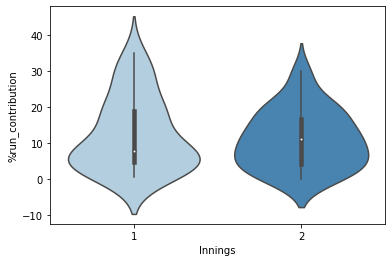

In [185]:
#fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1 = sns.violinplot(x=kwins['Innings'], y=kwins['%run_contribution'],palette="Blues")


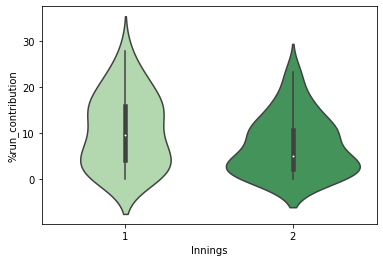

In [186]:
ax2 = sns.violinplot(x=kloss['Innings'], y=kloss['%run_contribution'],palette="Greens")

### **Question 15**
* Consider you are part of **team selection committee** for your team
* You are required to suggest **best nominations** for selection of **batsmen** during the team auctions
* Your team owner wants a **good mix** of batsmen who can exhibit the below **traits** :
  * Aggression(dismissal is less and more runs and high SR)
  * Consistency(based on runs set min and max runs)
  * Can hit at will(less dismissal)
  * Pinch hitters(quick runs in minimum balls)
  * Sheet Anchors(SR high)
  * Match finishers(aggressive, hit at will)
* Use the data provided to you to create an exhaustive **list of metrics** which can demonstrate **quality** of a given batsman
* Apply **suitable machine learning** techniques to generate **clusters** of batsmen
* **Analyze** the clusters for **batting traits** and name them suitably
* **Discuss** your outcomes 

In [ ]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

myfile = drive.CreateFile({'id': '1HBYvJClqYgC0fEntoIoz-PJoyV59214i'})
myfile.GetContentFile('ipl_batting.csv')

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
df7 = pd.read_csv('ipl_batting.csv')
df7.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18


In [ ]:
df7['is_dismissed'] = 0
for i in df7.index:
  if(df7['dismissal_mode'][i]=='not out'):
    df7['is_dismissed'][i] = 0
  else:
    df7['is_dismissed'][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
bmdf=df7.groupby('batsmen').sum()
bmdf

,R,B,M,fours,sixes,SR,is_fielder_involved,is_dismissed
batsmen,,,,,,,,
A Ashish Reddy,280.0,193.0,262.0,17.0,14.0,3163.89,8,15
A Chandila,4.0,7.0,16.0,0.0,0.0,66.66,0,0
A Chopra,53.0,71.0,0.0,7.0,0.0,370.36,3,6
A Choudhary,25.0,20.0,30.0,1.0,1.0,491.66,1,1
A Dananjaya,4.0,5.0,0.0,0.0,0.0,80.00,0,0
...,...,...,...,...,...,...,...,...
YV Takawale,192.0,178.0,115.0,26.0,3.0,1015.79,4,8
Yashpal Singh,47.0,66.0,13.0,5.0,0.0,306.11,4,4
Younis Khan,3.0,7.0,17.0,0.0,0.0,42.85,0,1


In [ ]:
bmdf['aggression'] = 0
bmdf['consistency'] = 0
bmdf['can_hit_at_will'] = 0
bmdf['pitch_hitters'] = 0
bmdf['sheet_anchors'] = 0
bmdf['match_finishers'] = 0
traits = pd.DataFrame(index=range(0,len(bmdf)),columns=['aggression','consistency','can_hit_at_will','pitch_hitters','sheet_anchors','match_finishers'])
traits['aggression'] = 0
traits['consistency'] = 0
traits['can_hit_at_will'] = 0
traits['pitch_hitters'] = 0
traits['sheet_anchors'] = 0
traits['match_finishers'] = 0
#traits['batsmen'] = ''
j=0
for i in bmdf.index:
  #traits['batsmen'][i] = bmdf['batsmen'][i]
  if((bmdf['is_dismissed'][i] < 100) & (bmdf['R'][i] > 1500) & (bmdf['SR'][i] > 10000)):
    bmdf['aggression'][i] = 1
    traits['aggression'][i] = 1
  if((bmdf['R'][i] > 2000)):
    bmdf['consistency'][i] = 1
    traits['consistency'][i] = 1
  if(bmdf['is_dismissed'][i] < 50):
    bmdf['can_hit_at_will'][i] = 1
    traits['can_hit_at_will'][i] = 1
  if((bmdf['fours'][i] > 200) & (bmdf['sixes'][i] > 150)):
    bmdf['pitch_hitters'][i] = 1
    traits['pitch_hitters'][i] = 1
  if(bmdf['SR'][i] > 15000 ):
    bmdf['sheet_anchors'][i] = 1
    traits['sheet_anchors'][i] = 1
  if((bmdf['aggression'][i]==1) & (bmdf['can_hit_at_will'][i]==1)):
    bmdf['match_finishers'][i] = 1
    traits['match_finishers'][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
kmeans = KMeans(n_clusters=6) 
kmeans.fit(bmdf)
y_kmeans = kmeans.predict(bmdf)
#print(y_kmeans)

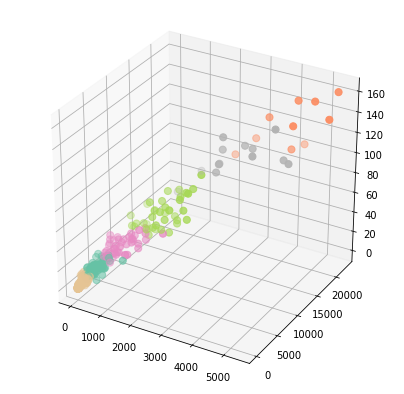

In [ ]:
plt.figure('K-Means on Iris Dataset', figsize=(7,7))
ax = plt.axes(projection = '3d')
ax.scatter(bmdf['R'],bmdf['SR'],bmdf['is_dismissed'], c=y_kmeans, cmap='Set2', s=50)

Orange - aggression
 
Pink - consistency
 
Blue - pitch hitters
 
Grey - sheet anchors
 
Green - can hit at will
 
Skin - match finishers